## 导入库

In [487]:
# 导入相关模块
import sklearn.datasets as skdata
import pandas as pd
# 画图
import seaborn as sns
import matplotlib.pyplot as plt
# 导入模型
# 线性回归
from sklearn.linear_model import LinearRegression
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics
# 交叉验证
from sklearn.model_selection import cross_val_score

## 读取数据

In [488]:
df = pd.read_csv('郑州二七区数据.csv','|')
df = df.drop(columns = ['城市','区域'])
df['房价'].describe()

count     270.000000
mean      202.511111
std       303.843346
min        23.000000
25%        91.000000
50%       120.500000
75%       158.000000
max      2228.000000
Name: 房价, dtype: float64

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   户型       270 non-null    int64  
 1   面积       270 non-null    float64
 2   楼层       270 non-null    int64  
 3   朝向_东     270 non-null    int64  
 4   朝向_北     270 non-null    int64  
 5   朝向_南     270 non-null    int64  
 6   朝向_西     270 non-null    int64  
 7   装修_毛坯    270 non-null    int64  
 8   装修_简装    270 non-null    int64  
 9   装修_精装    270 non-null    int64  
 10  板塔_塔楼    270 non-null    int64  
 11  板塔_板塔结合  270 non-null    int64  
 12  板塔_板楼    270 non-null    int64  
 13  房价       270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x14bf9faa208>,
 'caps': [<matplotlib.lines.Line2D at 0x14bfa2bc988>,
 'boxes': [<matplotlib.lines.Line2D at 0x14bfa2b5d08>],
 'medians': [<matplotlib.lines.Line2D at 0x14bfa2bcd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x14bfa2bcf48>],
 'means': []}

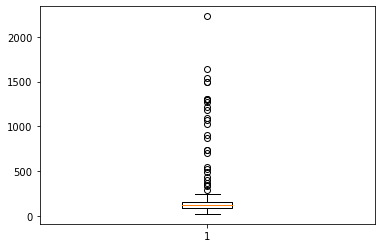

In [490]:
plt.boxplot(df['房价'])

E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\mat

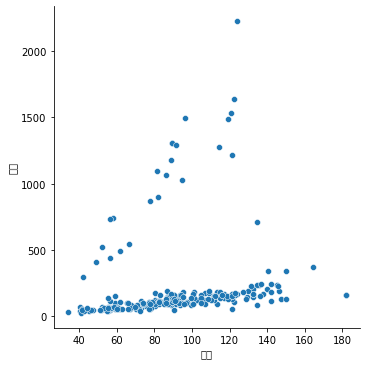

In [491]:
sns.relplot(x='面积', y='房价', data=df)

In [492]:
# sns.relplot(x='楼层', y='房价', data=df)

In [493]:
# sns.relplot(x='户型', y='房价', data=df)

## 筛选特征

In [494]:
df.columns

Index(['户型', '面积', '楼层', '朝向_东', '朝向_北', '朝向_南', '朝向_西', '装修_毛坯', '装修_简装',
       '装修_精装', '板塔_塔楼', '板塔_板塔结合', '板塔_板楼', '房价'],
      dtype='object')

In [495]:
tezheng = [
        ['面积','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','装修_毛坯', '装修_简装','装修_精装','房价'],
        ['面积', '楼层', '朝向_东', '朝向_北', '朝向_南', '朝向_西', '装修_毛坯', '装修_简装',
        '装修_精装', '板塔_塔楼', '板塔_板塔结合', '板塔_板楼', '房价'],
        ]

### 尝试不同的特征组合 

In [496]:
df = df[tezheng[2]]
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,房价
0,92.09,0,0,1,0,0,1,0,100
1,122.34,0,0,1,0,0,0,1,106
2,118.74,0,0,1,0,1,0,0,142
3,88.34,0,0,1,0,0,0,1,133
4,88.28,0,0,1,0,0,0,1,136
...,...,...,...,...,...,...,...,...,...
265,73.81,0,0,1,0,0,0,1,89
266,73.81,0,0,1,0,0,1,0,99
267,77.91,0,0,1,0,0,1,0,94
268,60.31,0,0,1,0,0,1,0,51


## 筛选数据

In [497]:
df.shape[0]

270

In [498]:
cnt = 0 
list = []
for i in range(df.shape[0]):
    if df['房价'][i] >= 500:
        list.append(i)
        cnt+=1
print(cnt)

df = df[-(df['房价']>=250)]

21


In [499]:
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,房价
0,92.09,0,0,1,0,0,1,0,100
1,122.34,0,0,1,0,0,0,1,106
2,118.74,0,0,1,0,1,0,0,142
3,88.34,0,0,1,0,0,0,1,133
4,88.28,0,0,1,0,0,0,1,136
...,...,...,...,...,...,...,...,...,...
265,73.81,0,0,1,0,0,0,1,89
266,73.81,0,0,1,0,0,1,0,99
267,77.91,0,0,1,0,0,1,0,94
268,60.31,0,0,1,0,0,1,0,51


E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\mat

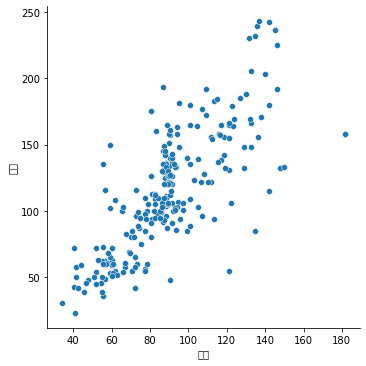

In [500]:
sns.relplot(x='面积', y='房价', data=df)

In [501]:
# sns.relplot(x='楼层', y='房价', data=df)

## 划分训练集和测试集

In [502]:
X = df.drop(columns = '房价')
y = df['房价']

In [503]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(X , y , random_state=22)

In [504]:
# 恢复划分数据后的索引
for i in [x_train,x_test]:
    i.index=range(i.shape[0])
x_test

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装
0,42.44,1,0,0,0,0,1,0
1,136.75,0,0,1,0,0,0,1
2,86.36,0,0,1,0,0,1,0
3,33.82,0,0,1,0,0,1,0
4,141.94,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
56,82.54,0,0,1,0,0,1,0
57,60.11,0,0,1,0,0,1,0
58,82.48,0,0,1,0,0,0,1
59,89.96,0,0,1,0,0,0,1


In [505]:
# 特征工程,划分到同一区间(-1~1)
# transfer = skprep.StandardScaler()
# x_train = transfer.fit_transform(x_train)
# x_test = transfer.fit_transform(x_test)

## 创建模型并训练

In [506]:
# estimator = sklinear.SGDRegressor(max_iter=50,alpha = 0.02)
# 特征方程
estimator = LinearRegression()

In [507]:
estimator.fit(x_train, y_train)

LinearRegression()

In [508]:
y_predict = estimator.predict(x_test)
print("预测值为:\n", y_predict)
print("模型中的系数为:\n", estimator.coef_)
print("模型中的偏置为:\n", estimator.intercept_)

预测值为:
 [ 45.062373   178.51755261 101.54801528  40.14219286 166.5068202
 113.23149931 121.85683181 112.06602601  66.69606202 123.01784699
 153.15580258 121.20233503  60.96921524  87.9672072  104.03744052
 103.60500515  60.2443607  104.77374939 170.22342689 102.58819766
 119.61284286 143.90261913 189.58556058  83.38572978 103.44138096
 122.81520209 136.44671832 148.78797006 125.53837617 124.53325612
 145.73754759 122.56976579 122.97882628 179.84992105 125.25787755
 121.36595923 160.48382897  85.17390847  60.20953148  65.39875591
  84.72978566  94.76929869 102.45963579 110.70701175  99.88839846
 109.44872635  48.5571514   96.26529132  98.78909143 152.48188931
  94.60567449  41.12727875 154.04404821 166.51850765 121.9386439
 150.85664737  97.08341228  70.86847896 115.08980265 123.83200957
  49.7221461 ]
模型中的系数为:
 [ 1.16874424  0.175239   -5.57140882  5.32963422  0.0665356  -1.79510915
 -8.14070293  9.93581209]
模型中的偏置为:
 3.42633134361067


## 误差及模型评估

In [509]:
# 回归类的模型评估指标
# 使用均方误差进行评估
from sklearn.metrics import mean_squared_error as MSE
# 使用预测出来的值和真实的值作为参数
MSE(y_predict,y_test)


773.6863087149073

In [510]:
# 查看真实值的均值
y_test.mean()
# 发现平均均方误差和test数据集的均值相差很大

116.31147540983606

In [511]:

# 使用我们的交叉验证进行评估
cross_val_score(estimator,X,y,cv=10,scoring='neg_mean_squared_error')
# 10组交叉验证，所以出现了10个结果
# 这个是负值均方误差，如果想要得到均方误差，前面*-1即可
# 只要使用scoring参数求误差，就必须写负均方误差

array([-1614.69908788,  -601.98598906,  -528.03812818,  -514.05553026,
        -517.90642145,  -730.13681946, -1228.86489403, -1104.88382592,
        -468.55360845,  -944.71196407])

In [512]:
# 得分
print("得分为:\n",estimator.score(x_test,y_test))

得分为:
 0.6803275738886343


In [513]:
# plt.figure()
# plt.scatter(x_train,y_train)
# plt.plot(x_test,y_predict,color='orange',linewidth=3)